# Topics in Model Performance

开始正式的贝叶斯推断介绍前，先了解一些基本概念。

参考资料：

- Bayesian Analysis with Python: Introduction to Statistical Modeling and Probabilistic Programming with PyMC3 and ArViz, 2nd Edition

你可能听说过这句话

`所有模型都是错误的，但有些是有用的`

这句格言归功于英国统计学家 George E.P.Box。这意味着模型应该代表现实，但它们很少完全保真。然而，一些模型可以提供有用的洞察力，而另一些模型对我们已经知道的东西几乎没有什么价值，或者更糟糕的是，它为我们提供了误导性的信息。

那么我们如何确定我们的模型是否可信呢？在机器学习中，我们采用交叉验证来为我们提供一种关于模型泛化到看不见的数据的能力的衡量。现在让我们看看其他一些以信息论为基础的衡量标准，以评估我们模型的预测能力。

## Underfitting vs. Overfitting

大多数人现在都听说过欠拟合和过拟合模型。更简单的模型应该是首选，但不能以牺牲准确性为代价。另一方面，过拟合模型可能无法很好地概括新数据。我们可以使用衡量解释方差比例的 $R^2$ 指标来衡量模型对数据的拟合程度。

如果我们使用线性回归的例子并从一阶多项式回归开始解释数据，我们可能会发现数据可能没有被充分捕获。这被称为欠拟合。我们可能不得不通过增加多项式的阶来逐步增加模型的复杂性。然而，过了某个点，模型开始过度拟合数据。这意味着该模型只是使用其表示能力来记忆数据，并且在输入模型的新数据上表现不佳（\\(R^2\\) 太高）。

我们想要一个在欠拟合和过拟合之间找到平衡的模型，这种权衡通常被称为偏差-方差权衡。偏差是由于无法容纳数据而导致的数据错误。该模型没有捕获数据中所有变化和模式的表示能力。方差是模型对数据的敏感性导致的误差，通常是模型过于复杂造成的。由于这个原因，经常使用正则化通过最小化系数的数量来降低回归模型（或神经网络）的复杂性。

![Underfitting vs. Overfitting (from AWS)](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png)

<center>Underfitting vs Overfitting (from AWS  docs)</center>

## $R^2$ and Explained Variance

### What does it do?

$R^2$ 是一种拟合优度度量，它告诉您数据与我们创建的模型的拟合程度。它解释了自变量解释的结果中方差的比例。

### Derivation

如果我们观察 $y_i$ 给出的数据，使得拟合模型为每个点 i 预测 $f_i$，我们可以写出所有观察数据的平均值，由 \\(y_{mean}\\) 给出

$$y_{mean} = \dfrac{1}{n} \sum_i y_i$$

* 与数据方差成正比的总平方和为

$$SS_{tot} = \sum_i (y_i - y_{mean})^2$$

* 残差平方和（也称为误差）定义为

$$SS_{res} = \sum_i (y_i - f_i)^2$$

* 现在，\\(R^2\\) 被定义为

$$R^2 = 1 - \dfrac{SS_{res}}{SS_{tot}}$$

### How do we interpret this?

* \\(R^2\\) 对于完全符合观察数据的模型为 1，即 \\(f_i = y_i\\) 对所有 i。

* 如果模型预测 \\(y_{mean}\\) 总是那么 \\(SS_{res} = SS_{tot}\\) 和 \\(R^2 = 0\\)，这表示基线模型所有其他模型都可以与之进行比较。

* 任何表现比基线模型差的模型都会有一个负的 $R^2$ 分数。

### Explained Variance 

术语 $\dfrac{SS_{res}}{SS_{tot}}$ 也称为无法解释的方差。所以

$R^2 = 1 - Unexplained Variance$

or 

$R^2 = Explained Variance$

## Measures for Predictive Performance

模型的精度可以通过以下方法来衡量：

### 1. Cross-Validation 

在这里，我们将数据划分为不重叠的子集，并对不同的子集进行训练和验证。根据我们执行此交叉验证的方式，它可以称为 K 折交叉验证或留一法交叉验证 (LOOCV)。在 **K-fold Cross-Validation** 中，我们将数据划分为“K”个折叠或子集，在 k-1 折叠上执行模型训练，同时在剩下的 1 折叠上评估模型性能。我们迭代地选择每个折叠作为测试折叠，而其他折叠成为训练折叠。


![Image from the scikit-learn page for K-fold cross validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png) 


<center><i>K-fold Cross-Validation from the scikit-learn page</i></center>

如果折叠数等于数据点数，我们有**留一法交叉验证**。

### 2. Information criteria

**Reference** 

* [Predictive metrics presentation from Liberty Mutual](https://www.casact.org/education/rpm/2016/presentations/PM-LM-4-Tevet.pdf)

许多牢牢植根于信息论的思想帮助我们量化模型的表现。

1. Log-likelihood (Log predictive density) and deviance

2. Akaike Information Criterion (AIC)

3. Widely Applicable Information Criterion (WAIC)

4. Deviance Information Criterion (DIC) 

5. Bayesian Information Criterion (BIC)

对 (2) 到 (5),

* 它们采用方程的形式，其中有两个项由下式给出

    $$metric = model\;fit + penalization$$
    
* 模型拟合是使用给定模型参数的数据的对数似然来测量的（可以是逐点估计，也可以使用完整的后验分布）

* 较低的值意味着更好的拟合

AIC、BIC 和 DIC 使用数据的联合概率，而 WAIC 计算数据的逐点概率。下面，我们假设模型参数是独立的，因此联合概率与逐点估计的乘积相同。

### Log-likelihood and Deviance

**Reference**

* [Cousineau, Denis et Teresa A. Allan. "Likelihood and its use in Parameter Estimation and Model Comparison." Mesure et évaluation en éducation, volume 37, number 3, 2015, p. 63–98. https://doi.org/10.7202/1036328ar](https://www.erudit.org/en/journals/mee/2015-v37-n3-mee02497/1036328ar/)

这些术语用于衡量我们模型中与模型试图拟合的数据有关的误差。大多数人都熟悉由下式给出的均方误差 (MSE)

$$MSE = \sum_1^n (y_{true} - y_{predicted})^2 / n$$

#### Log-likelihood (Log predictive density)

虽然这是一种完全可以接受的测量误差的方法，尤其是在似然是正态分布的情况下，但在理论上更合理的测量模型性能的方法是使用对数似然函数。

$$Loglikelihood = \sum_1^n log p(y_i | \theta)$$


如果似然函数为正态，则对数似然与 MSE 成正比。

#### Deviance

偏差是从饱和模型的对数似然中减去模型的对数似然的两倍。饱和模型是一种过度拟合的模型，它完美地拟合了观察到的数据。可以重写以强调值的范围现在是从 0 到 \\(\infty\\)。

$$Deviance = -2 \sum_1^n ( log p(y_i | \theta) - log p(y_i | \theta_s) $$

#### Why use the Deviance over the Log-likelihood?

请注意，似然函数 $p(y_i | \theta)$ 的值从 0 表示不拟合到 1 表示完全拟合模型。这导致对数似然函数采用从 $- \infty$ 到 0 的值。将对数似然函数乘以 -2 会得到一个类似于 MSE 的可解释数字。

* 拟合不佳的模型具有较大的正值

* 完美拟合模型的值为 0。

复杂模型在训练集（样本内数据）上的偏差值较低，这需要在比较模型时进行惩罚。这与我们之前谈到的模型过度拟合有关。

#### A Note on MLE

最大似然估计 (MLE) 基于估计参数 $\theta$ 的概念，该参数使概率 $\sum_1^n p(y_i | \theta)$ 最大化。虽然还有其他方法可以做到这一点，但如果样本量足够大，MLE 是分布参数 $\theta$ 的最有效估计器。此外，随着样本量的增加，估计参数趋于真实参数，误差变为正态分布。

当您有非正态分布（即参数受观察值约束的分布）时，MLE 的缺点就会出现。对于此类分布，可能不存在最大似然。在存在多个最大值的情况下，可能会出现类似的问题。

### Posterior Predictive Distribution to Estimate Predictive Accuracy

这就给了利用**后验预测分布**的场景，这是贝叶斯的。这使我们能够测量模型生成新数据的概率，即 \\(p(y_{new} | y)\\)。这可以解释为问“鉴于在样本内数据上训练的模型，看到新的样本外数据的概率是多少？”。预测准确率可以写为

$$accuracy = p(y_{new} | y) = \int p(y_{new} | \theta) p(\theta | y) d \theta$$

这么做的原因是参数现在不是一个点估计，而是一个分布，我们需要计算所有可能性。

其中 \\(p(\theta | y)\\) 是 \\(\theta\\) 的后验分布，我们对 \\(\theta\\) 的整个分布进行积分。现在这就是 \\(p(y_{new} | \theta)\\) 对 \\(\theta\\) 后验分布的期望。简单来说，它是所有看到 \\(y_{new}\\) 的概率在 \\(\theta\\) 的所有可能值上计算的平均值。

$$accuracy = E [ p(y_{new} | \theta) ]$$

这需要以下步骤

1. 从 \\(\theta\\) 的后验分布中抽样一个 \\(\theta_i\\)

2. 给定 \\(\theta_i\\) 的值，计算我们能看到 \\(y_{new}\\)  的可能性有多大，也就是计算 \\(p(y_{new} | \theta_i)\\)

3. 重复（1）和（2）多次以计算 \\(p(y_{new} | \theta)\\) 的期望

经常使用log计算：

$$accuracy = log( E [ p(y_{new} | \theta) ])$$

### Akaike Information Criterion (AIC)

AIC 源自频率统计者世界，不使用后验分布。因此，它不是对后验积分，而是使用 \\(\theta\\) 的 MLE 估计。\\(E [ p(y_{new} | \theta) ]\\) 现在替换为 \\(p(y_{new} | \theta_{mle})\\)。

$$AIC = -2 \sum_{i=1}^n log p(y_i | \theta_{mle}) + 2 n_{parameters}$$

这里 \\(n_{parameters}\\) 是指模型中的参数数量，\\(\theta_{mle}\\) 是 \\(\theta\\) 的 MLE 估计。我们想要一个具有较低 AIC 的模型，第二项旨在通过增加 AIC 的值来惩罚复杂模型。由于这不使用后验分布，因此不考虑有关参数不确定性的任何信息。

### Bayesian Information Criterion (BIC)

BIC 与 AIC 非常相似（实际上根本不是贝叶斯）。第一项与 AIC 中的相同，但偏差校正项现在也包含样本数。

$$BIC = -2 \sum_{i=1}^n log p(y_i | \theta_{mle}) + n_{parameters} \; log \; n_{samples}$$

### Deviance Information Criterion (DIC)

DIC 是一种更贝叶斯的替代方法，它使用后验平均点估计 \\(\theta_{Bayes}\\) 而不是 MLE 估计。这里 \\(\theta_{Bayes}\\) 是 \\(\theta\\) 的期望值。

$$DIC = -2 \sum_{i=1}^n log p(y_i | \theta_{Bayes}) + 2 var_{posterior} \; log p(y_i | \theta )$$


### Widely Applicable Information Criterion (WAIC)

**Reference**

* [WAIC by Gelman](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf)

广泛适用的信息准则或 WAIC 是 AIC 的贝叶斯扩展。对数逐点预测密度的推导类似于我们上面介绍的内容，但在此处进行复制以使其与引用的论文保持一致。

#### Log pointwise predictive density (lppd)

可以定义新数据点 $y_{new}$ 的预测值

$$p_{post}(y_{new}) = \int p(y_{new} | \theta) p_{post}(\theta) d \theta $$

如果我们取双方的对数，我们得到

$$log p_{post}(y_{new}) = log \int p(y_{new} | \theta) p_{post}(\theta) d \theta$$

其中 \\(p_{post}(\theta)\\) 是通过训练我们的模型获得的 \\(\theta\\) 的后验分布。这是新点的预测拟合。如果我们有许多新数据点 i=1,...n 我们可以为使用新数据的模型的对数逐点预测密度编写以下内容

$$lppd = log \prod_i p_{post} (y_{new_i}) = \sum_i \int log p(y_{new_i} | \theta ) p_{post} (\theta) d \theta$$

* 实际上，\\(\theta\\) 上的内积分是使用\\(\theta\\)（采样）的可能值的平均值计算的，表示为\\(\theta_S\\)。

$$\sum_i \int log p(y_{new_i} | \theta ) p_{post} (\theta) d \theta = \sum_i log \dfrac{1}{S} \sum_S p(y_{new_i} | \theta_{S})$$

* 现在假设我们没有保持集 $y_{new}$ 并且我们在我们的训练集上计算 lppd，这不是衡量模型未来性能的好方法。因此 WAIC 添加了一个术语来纠正这种高估的性能。此校正测量 y 的每个元素在 \\(\theta_S\\) 的不同样本上计算的对数似然方差。这种校正可以看作是一种旨在减少参数数量的惩罚，因为更多的模型参数意味着更大的后验分布或方差。

$$2 \cdot \sum_i Var_{s} ( log p(y_{new_i} | \theta_{S}) )$$

* WAIC 现在定义为上述两项的总和

$$WAIC = -2 \sum_i log \dfrac{1}{S} \sum_S p(y_{new_i} | \theta_{S}) +  2 \sum_i Var_{s} ( log p(y_{new_i} | \theta_{S}) )$$

### A Qualitative Discussion

* AIC 可能不适用于更复杂的模型，因为这只是使用参数数量来惩罚模型
* 这里值得强调的是，除了交叉验证（带有测试集）之外，上述所有指标/方法都**使用样本内数据来评估样本外性能**。这类似于使用训练集而不是测试集来评估机器学习中的模型性能。然而，与机器学习中通常执行的不同，我们应用偏差校正来纠正通过估计样本数据的性能而引入的错误。但是，如果使用测试集，交叉验证就完全不需要这种纠错。

* AIC 和 DIC 更容易计算，但与 WAIC 不同，它们不是完全贝叶斯的。但是，WAIC 的计算量更大。

* 可以通过计算对数后验密度使交叉验证成为贝叶斯。然而，与其他技术相比，这在计算上变得相当昂贵。

## Entropy and KL Divergence

**Reference**

* [Information Theory](https://arxiv.org/pdf/1511.00860.pdf)

在下面的示例中使用了求和，因为假设离散分布。连续分布的话可以用积分代替。

### Entropy

如果存在概率分布由 P(x) 给出的随机离散变量“x”，则随机变量“x”的熵是信息不确定性的度量，可以计算为 

$$H(x) = - \sum_x \: p(x) log \:  p(x) $$

其中较大的熵值表示较高的不确定性。从几何上讲，我们可以将其可视化为具有更大分布的分布。虽然很容易将其与方差等同起来，但有一些例子，例如双峰高斯分布，其中增加方差不会增加熵。熵是一个点周围概率密度质量的度量，而方差衡量概率质量从平均值延伸的程度。可能有两个相距很远的窄模式，由于值的相对确定性（围绕窄模式），这表示高方差但低熵。

熵是定义先验的有用方法，因为具有高熵的先验可以用作无信息先验。给定参数值的某些限制，以下可以用作这些参数的先验。

1. 无约束——均匀分布
2. 高密度区域的正均值 - 指数分布
3. 固定方差 - 正态分布
4. 具有固定均值的两个结果 - 二项分布

下面的代码展示了不同分布的熵

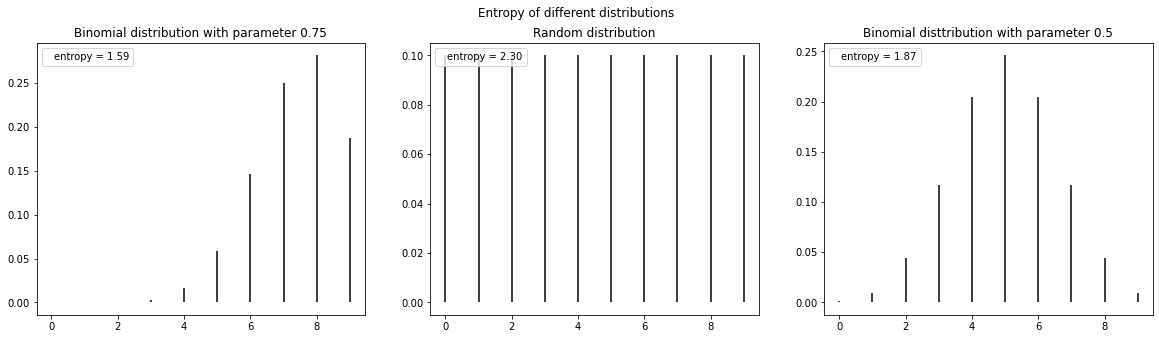

In [2]:
# Example from [1]
import numpy as np 
from scipy import stats
from matplotlib import pyplot as plt
np.random.seed(912)
x = range(0, 10)
q = stats.binom(10, 0.75)
q2 = stats.binom(10, 0.5)
r = stats.randint(0, 10)
true_distribution = [list(q.rvs(200)).count(i) / 200 for i in x]
q_pmf = q.pmf(x)
q2_pmf = q2.pmf(x)
r_pmf = r.pmf(x)
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].vlines(x, 0, q_pmf, label=f'entropy = {stats.entropy(q_pmf):.2f}')
ax[1].vlines(x, 0, r_pmf, label=f'entropy = {stats.entropy(r_pmf):.2f}')
ax[2].vlines(x, 0, q2_pmf, label=f'entropy = {stats.entropy(q2_pmf):.2f}')
ax[0].set_title('Binomial distribution with parameter 0.75')
ax[1].set_title('Random distribution')
ax[2].set_title('Binomial disttribution with parameter 0.5')
fig.suptitle("Entropy of different distributions")
stats.entropy(true_distribution)
#ax[idx].set_xticks(x)
ax[0].legend(loc=2, handlelength=0)
ax[1].legend(loc=2, handlelength=0)
ax[2].legend(loc=2, handlelength=0)


### KL Divergence

KL Divergence 类似于熵的概念，只是它用于比较两个分布的相似度和接近度。它被定义为两个离散分布

$$KL(p||q) = \sum_x p(x) \: log \dfrac{p(x)}{q(x)}$$

KL 散度的值从相同分布的 0 变化到无穷大，具体取决于分布之间的差异。重要的是要理解这不是距离度量，因为它不是对称的，因为

$$KL(q||p) = \sum_x q(x) \: log \dfrac{q(x)}{p(x)}$$

Jensen Shannon 散度是 KL 散度的对称版本

KL 散度 $KL(p||q)$ 可以看作是两个熵的差异

$$KL(p||q) = \sum_x p(x) \: log p(x) - \sum_x p(x) \: log q(x)$$

其中第一项是“p”的熵，第二项是“p”和“q”之间的交叉熵。

KL 散度通常用于机器学习中来学习分布。如果真实分布可用，则可以优化提议的分布以使其尽可能接近真实分布。

In [57]:
from scipy.stats import entropy

print("KL Divergence between the true distribution and the uniform distribution ",entropy(true_distribution, r_pmf))
print("KL Divergence between the true distribution and the q distribution ",entropy(true_distribution, q_pmf))
print("KL Divergence between the true distribution and the q2 distribution ",entropy(true_distribution, q2_pmf))

KL Divergence between the true distribution and the uniform distribution  0.7394593875511319
KL Divergence between the true distribution and the q distribution  0.009657896086383405
KL Divergence between the true distribution and the q2 distribution  1.276465607901914


## Model Averaging

有时，模型选择可能不是最适合我们问题的解决方案，例如当没有单个模型提供令人满意的性能时。或者，如下文所述，当我们想要利用与不同模型相关的方差作为不确定性的度量时。在这些情况下，我们可能想求助于模型平均。

### Pseudo Bayesian Modeling Averaging

[Using Stacking to Average Bayesian Predictive Distributions](http://www.stat.columbia.edu/~gelman/research/published/stacking_paper_discussion_rejoinder.pdf)

当有多种模型可供选择时，很容易选择具有最佳性能的模型（取决于我们如何定义性能）。然而，这样做我们忽略了其他模型提供的不确定性信息。减轻这种不确定性的一种方法是执行模型平均。通过使用所有模型的加权平均获得的元模型可用于进行预测。完成这种平均的一种方法是计算类似于使用 softmax 公式的权重

$$w_i = \dfrac{e^{-dE_i / 2}}{\sum_j e^{-dE_j / 2}}$$

其中 \\(dE_i\\) 是第 i 个模型的 WAIC 值与具有最低 WAIC 的模型相比的差异。

任何信息标准度量都可以在这个等式中使用，例如 AIC。使用以这种方式计算的权重对模型求平均称为伪贝叶斯建模平均。

### Stacking

最近提出的另一种技术是预测分布的堆叠。这背后的想法是组合模型，以便最小化加权元模型和真实模型之间的差异。当使用对数分数时，类似于 KL 散度，可以使用以下等式

$$model = max_w \dfrac{1}{n} \sum_i^{n} log \sum_k w_k p(y_i | y_{-i}, M_k)$$

其中 n 是数据点的数量，\\(M_k\\) 是第 k 个模型，\\(w_k\\) 是应用于第 k 个模型的权重。 \\(y_{-i}\\) 是 y 中除 \\(y_i\\) 之外的每个元素。术语 \\(p(y_i | y_{-i}, M_k)\\) 对应于使用留一法交叉验证 (LOOCV) 程序的预测概率密度。目标是选择使看到 \\(y_i\\) 的概率最大化的权重组合，从而为我们提供理想的元模型，据我们所知，基于可用数据，最大限度地减少分歧。请注意，这里的 argmax 是在 'w' 上计算的，而不是在某些资源中列出的 'n'。